## This.ipynb file provides examples of training and testing different models in the Inter-Subject-TL scenario

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
# import sys
# path = os.path.join(os.getcwd())
# sys.path.append(path) 
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
# os.environ.get('PATH', '')
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from train.trainTest import ModelTrainTest
from tensorflow.python.client import device_lib
from IPython.display import clear_output as clear
%matplotlib inline
# print(plt.style.available)
plt.style.use('Solarize_Light2')
print('tf.version:',tf.__version__,'keras.version:',keras.__version__)
print('is_gpu_available: ', tf.config.list_physical_devices('GPU'))
print('gpu_device_name: ', tf.test.gpu_device_name())
# 列出所有的本地机器设备
local_device_protos = device_lib.list_local_devices()
[print(x) for x in local_device_protos if x.device_type == 'GPU'] # 只打印GPU设备
# Specify Gpu-0 for model training
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# Allocate minimum memory based on actual usage
# gpus = tf.config.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

tf.version: 2.10.0 keras.version: 2.10.0
is_gpu_available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
gpu_device_name:  /device:GPU:0
name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3660578816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7951437607069720084
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419


In [2]:
"""parameters settings"""
attention = 'SA'  # One of ['None', 'SE', 'SA'].
withTransfer = True
trainPlot = False
ReduceLR = True
EarlyStop = True
saveModelHistory = True
savePredictResult = True
savePlotResult = True

Inter-Subject source-model training and testing of: model-Sinc-BiLSTM, task-N-N, subject-10N

========================================2023-11-14 19:23:29========================================
===============第 1==1 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
sourceData: (6107, 320, 5) sourceMotionLabel: (6107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/1000
138/138 [==============================] - 18s 49ms/step - loss: 2632.2012 - PredictOutput_loss: 2629.4426 - ClassOutput_loss: 2.7577 - PredictOutput_R2_Score: -0.0177 - PredictOutput_mae: 39.6586 - ClassOutput_accuracy: 0.5116 - val_loss: 2586.4185 - val_PredictOutput_loss: 2584.9954 - val_ClassOutput_loss: 1.4236 - val_PredictOutput_R2_Score: 0.0074 - val_PredictOutput_mae: 38.7760 - val_ClassOutput_accuracy: 0.6217 - lr: 0.0010
Epoch 2/1000
138/138 [==============================] - 6s 41ms/step - loss: 2531.2573 - PredictOutput_loss: 2528.3215 - Clas

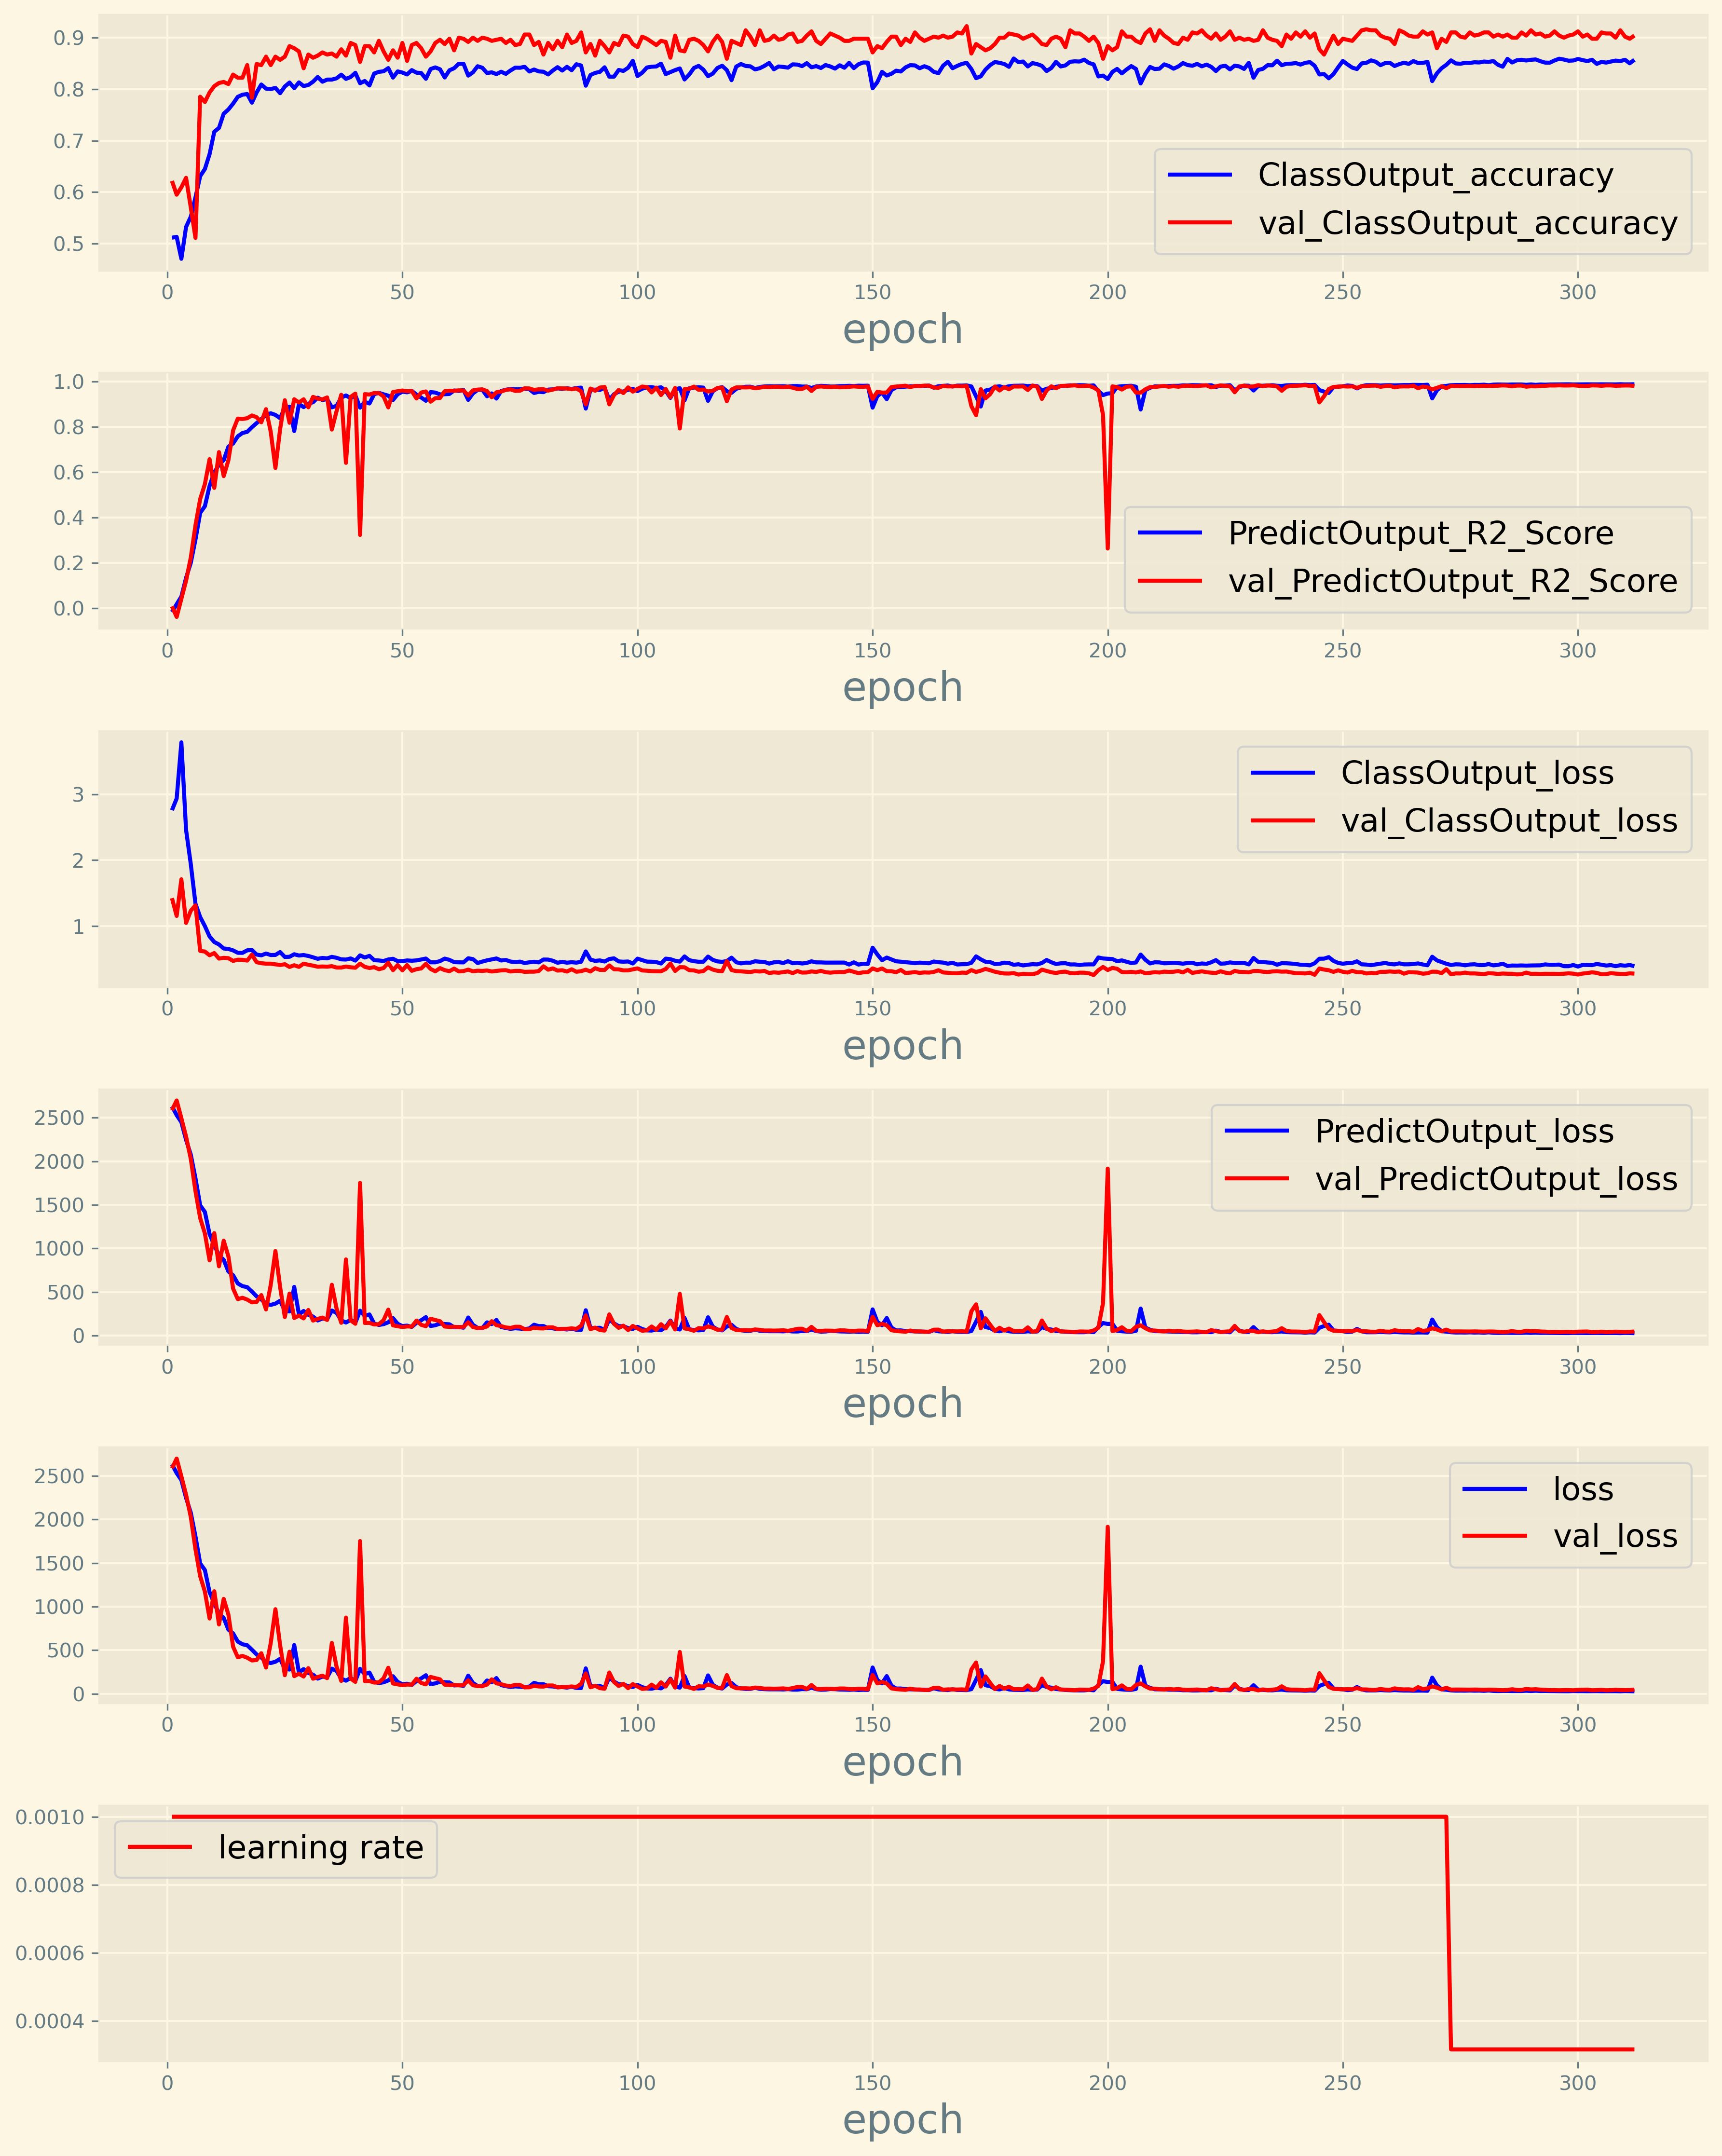

accuracy：90.753, precision：88.960, recall：85.366, specificity：95.057, npv：95.873, f1：86.722
r2：0.977, mse：59.814, rmse：7.734, mae：5.018
Test results of 1 experiments:
accuracy  =  90.753
precision  =  88.960
recall  =  85.366
specificity  =  95.057
npv  =  95.873
f1  =  86.722
r2  =  0.977
mse  =  59.814
rmse  =  7.734
mae  =  5.018
train_time  =  1606.613


In [3]:
"""Source-domain Model Training"""
subType = 'sourceSubjects'
dicts = {'tasks':['N-N', 'A-A', 'N-A'],
         'targetSubjects':[['1N','2N','3N','4N','5N','6N','7N','8N','9N','10N','11N'],
                           ['1A','2A','3A','4A','5A','6A','7A','8A','9A','10A','11A'],
                           ['1A']]}
modelTypes = ['CNN-LSTM', 'CNN-BiLSTM', 'CNN-GRU', 'CNN-BiGRU', 'CNN-TCN', 'Sinc-LSTM', 'Sinc-BiLSTM', 'Sinc-GRU', 'Sinc-BiGRU', 'Sinc-TCN']

for modelType in modelTypes:
     for i in range(len(dicts['tasks'])):
        for j in range(len(dicts['targetSubjects'][0])):
            clear()
            task = dicts['tasks'][i]
            targetSubject=dicts['targetSubjects'][i][j]
            print('Inter-Subject source-model training and testing of: model-%s, task-%s, subject-%s' % (modelType, task, targetSubject))
            train_utils = ModelTrainTest(model_type=modelType, attention=attention)
            train_utils.train(with_transfer=withTransfer, task=task, target_subject=targetSubject, sub_type=subType, 
                              train_plot=trainPlot, reduce_lr=ReduceLR, early_stop=EarlyStop, save_model_history=saveModelHistory, 
                              save_predict_result=savePredictResult, save_plot_result=savePlotResult)

Inter-Subject target-model training and testing of: model-Sinc-BiLSTM, task-N-N, subject-10N

========================================2023-11-14 19:50:24========================================
===============第 1==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
sourceData: (6107, 320, 5) sourceMotionLabel: (6107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/500
25/25 [==============================] - 9s 116ms/step - loss: 3016.7446 - PredictOutput_loss: 3014.1182 - ClassOutput_loss: 2.6265 - PredictOutput_R2_Score: -1.9534 - PredictOutput_mae: 44.5237 - ClassOutput_accuracy: 0.5917 - val_loss: 2697.3096 - val_PredictOutput_loss: 2696.7441 - val_ClassOutput_loss: 0.5654 - val_PredictOutput_R2_Score: -2.1114 - val_PredictOutput_mae: 42.2498 - val_ClassOutput_accuracy: 0.8652 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - 1s 44ms/step - loss: 2706.8123 - PredictOutput_loss: 2705.9382 - ClassOutp

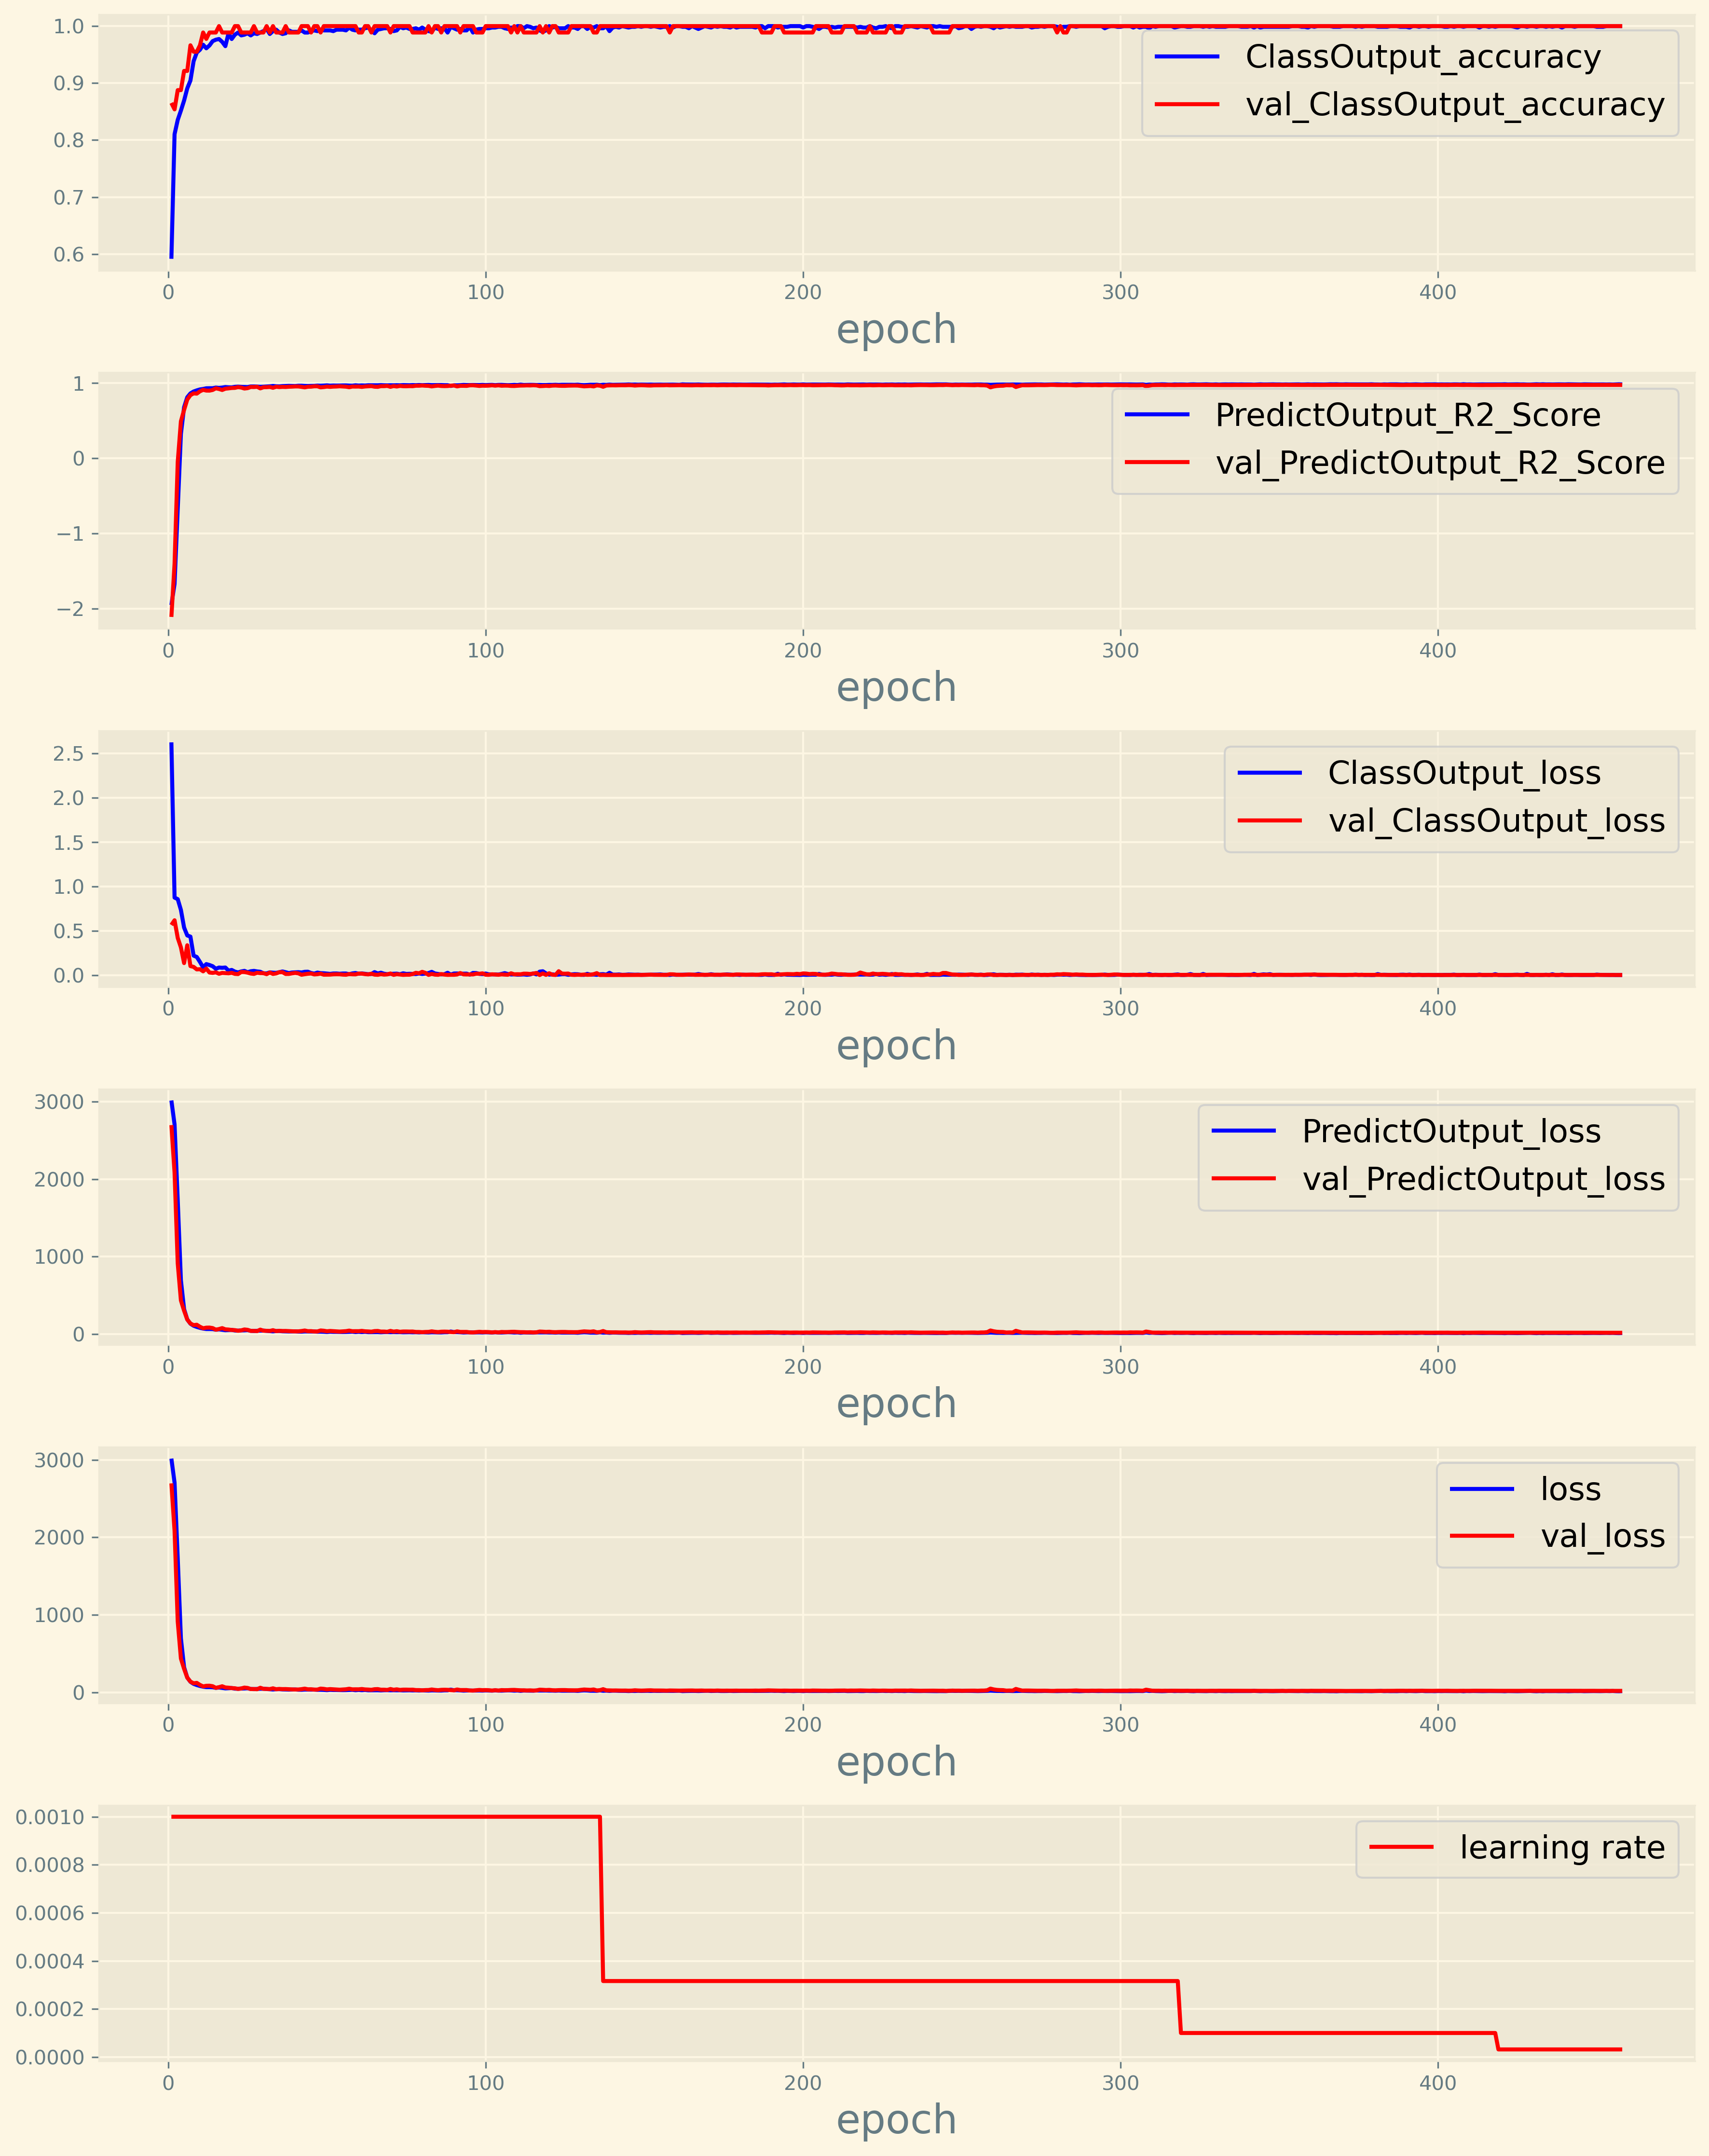

(1107, 64) (1107, 64)


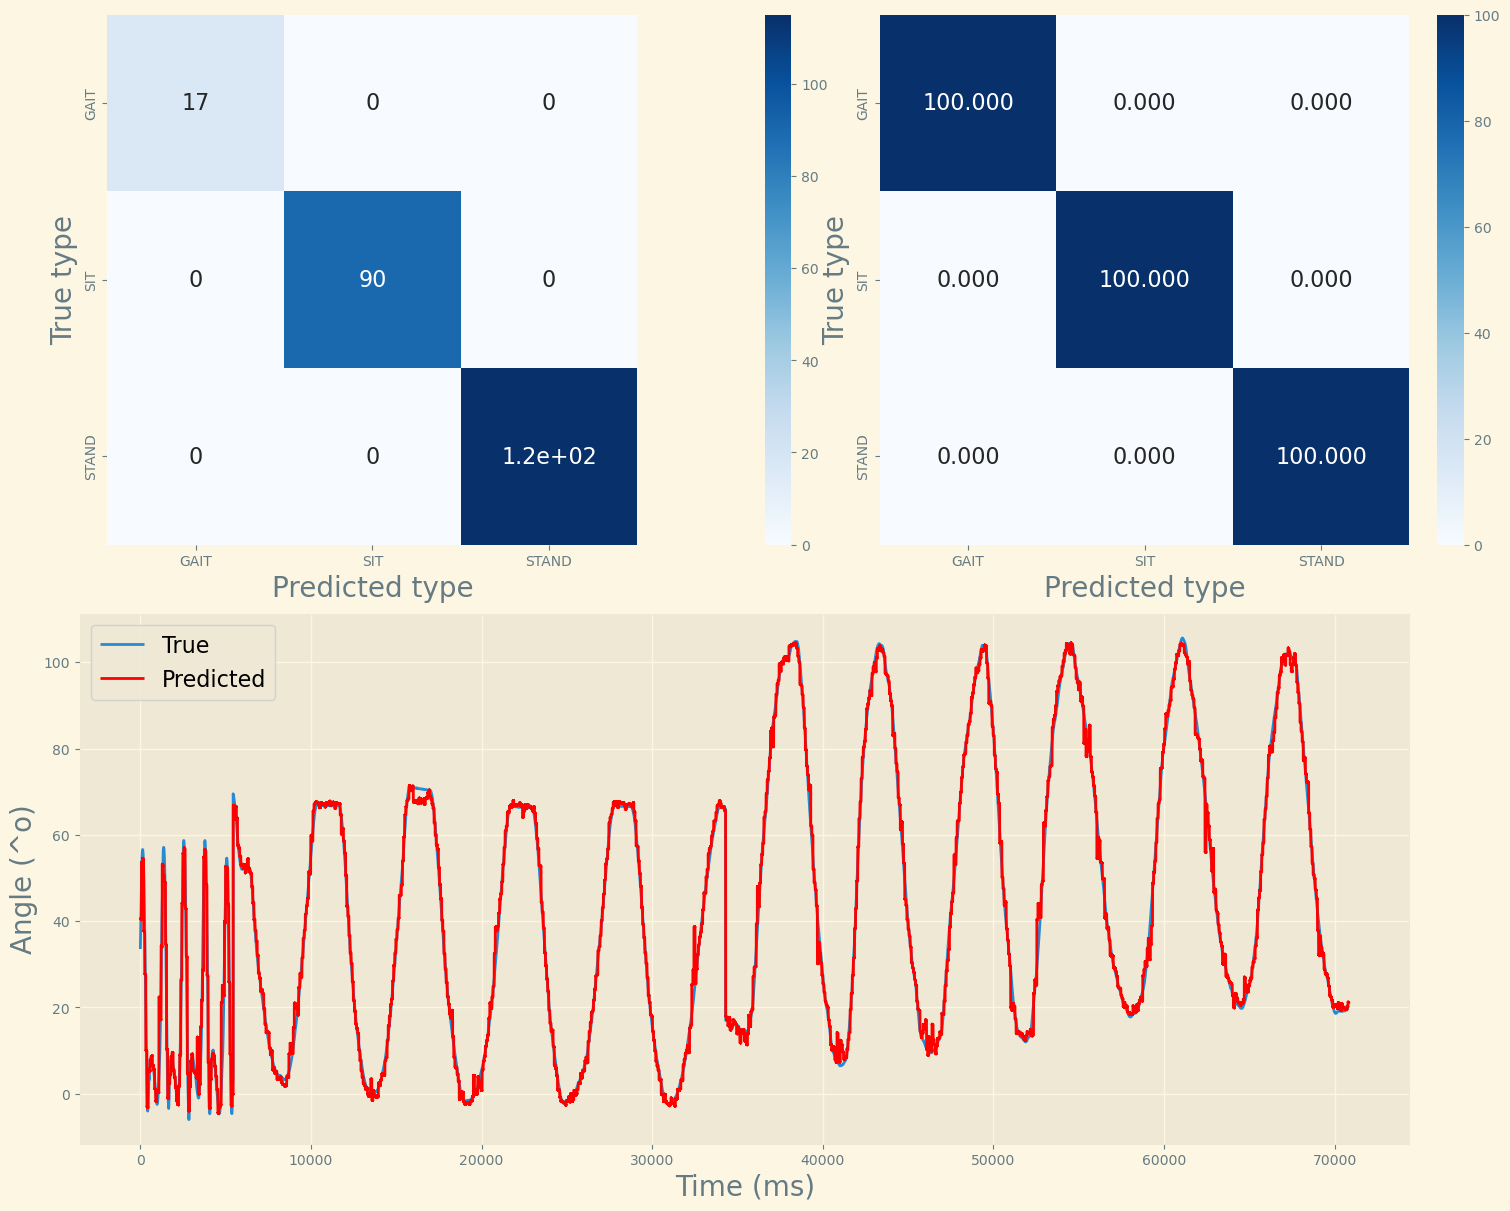

accuracy：100.000, precision：100.000, recall：100.000, specificity：100.000, npv：100.000, f1：100.000
r2：0.986, mse：13.837, rmse：3.720, mae：2.570

========================================2023-11-14 19:58:08========================================
===============第 2==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
sourceData: (6107, 320, 5) sourceMotionLabel: (6107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/500
25/25 [==============================] - 8s 96ms/step - loss: 2895.1372 - PredictOutput_loss: 2892.3245 - ClassOutput_loss: 2.8127 - PredictOutput_R2_Score: -1.9053 - PredictOutput_mae: 43.5807 - ClassOutput_accuracy: 0.5490 - val_loss: 2967.9270 - val_PredictOutput_loss: 2967.5000 - val_ClassOutput_loss: 0.4268 - val_PredictOutput_R2_Score: -1.7369 - val_PredictOutput_mae: 43.8438 - val_ClassOutput_accuracy: 0.8090 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - 1s 55ms/step - loss: 2373.

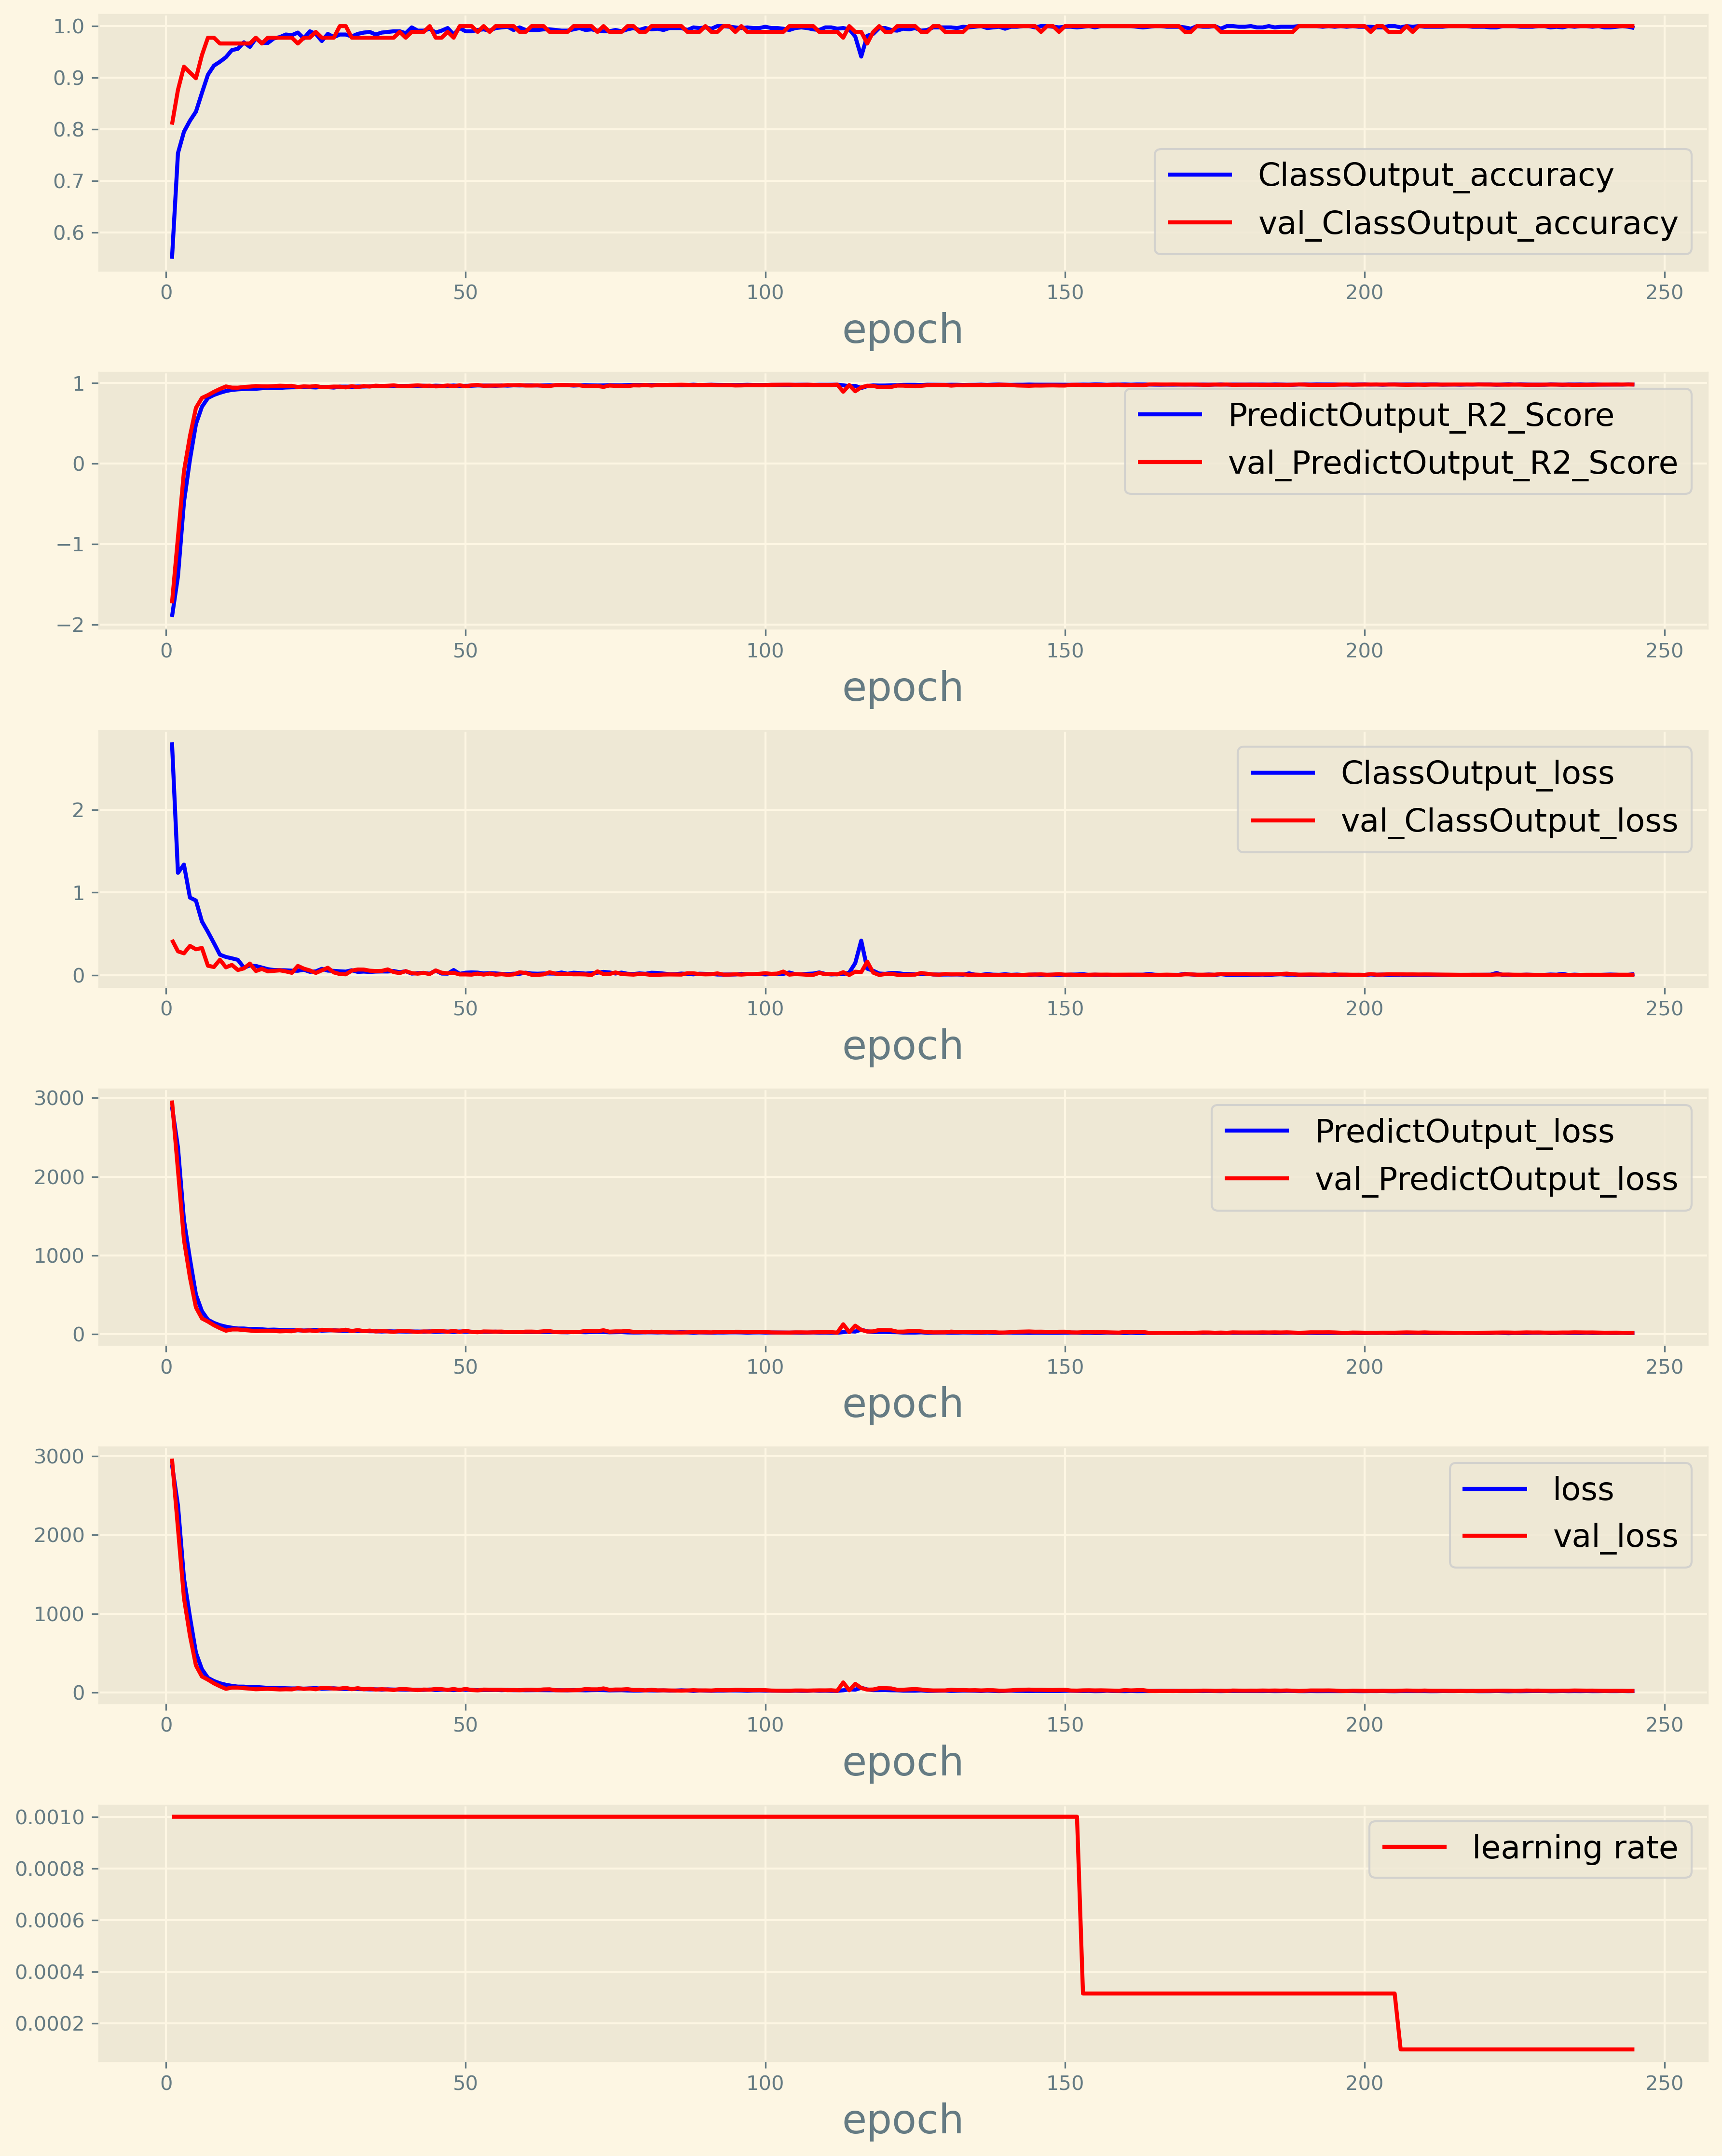

(1107, 64) (1107, 64)


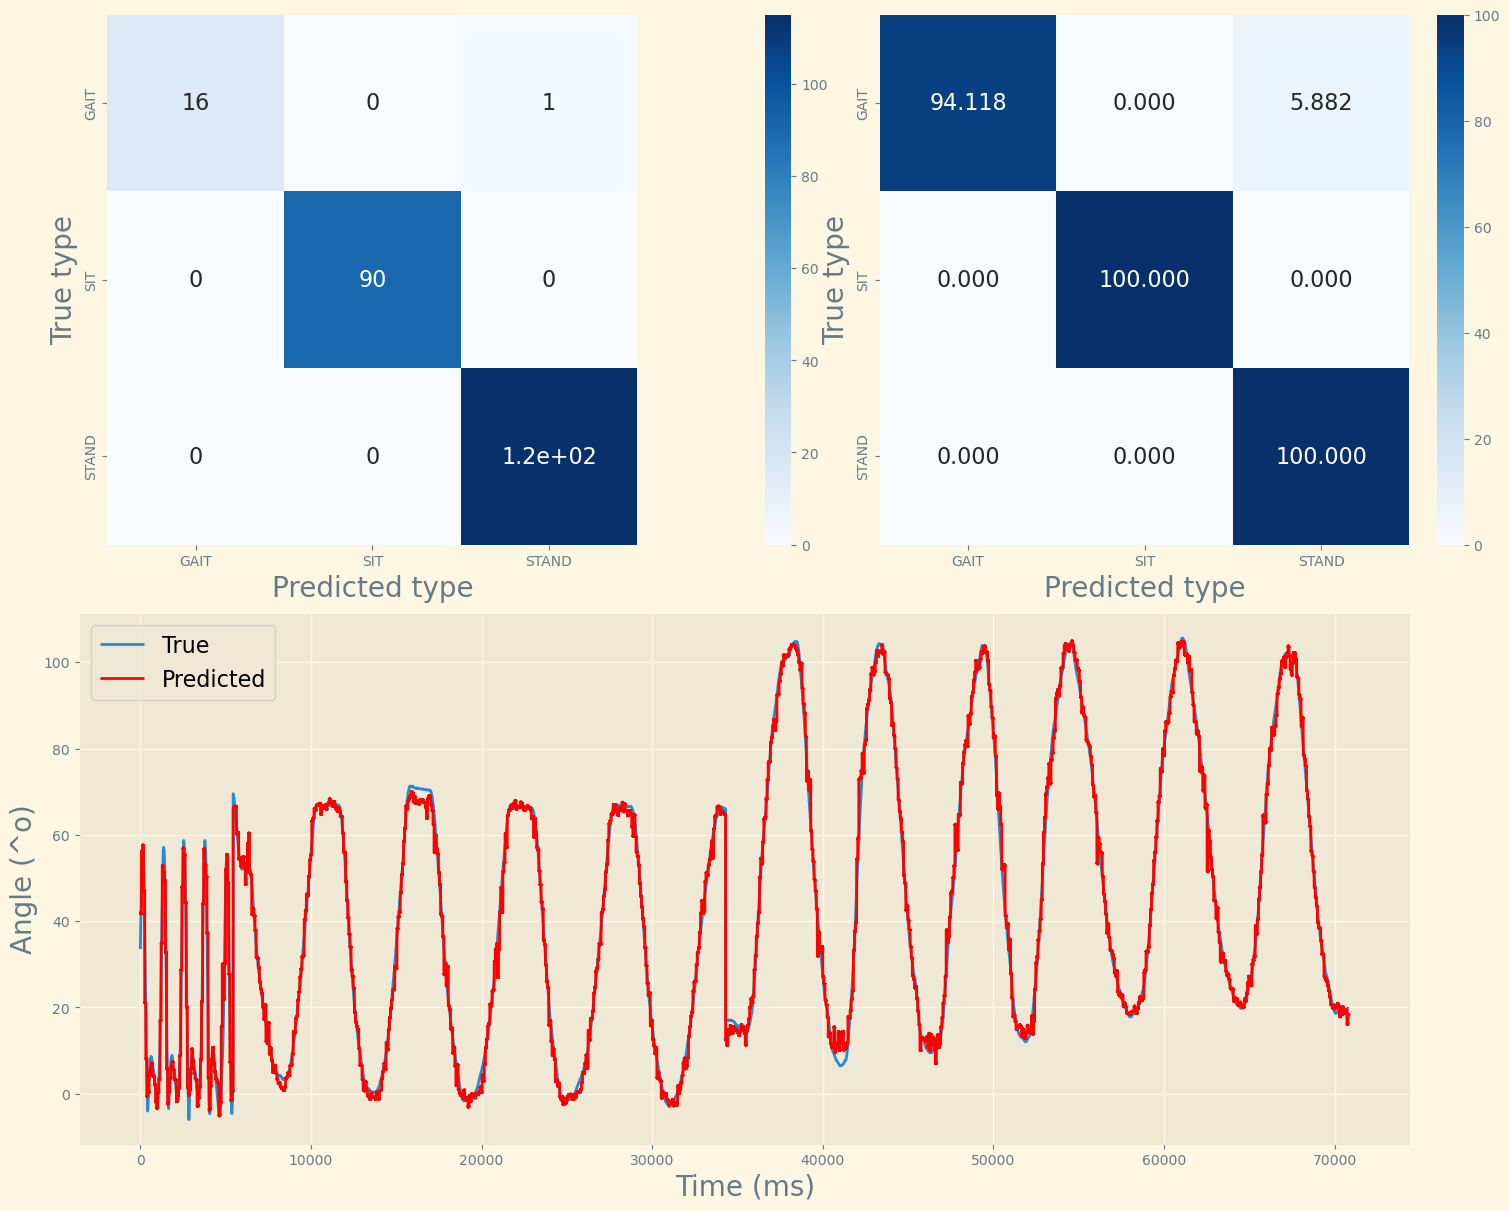

accuracy：99.550, precision：99.713, recall：98.039, specificity：99.688, npv：99.838, f1：98.846
r2：0.987, mse：13.797, rmse：3.714, mae：2.686

========================================2023-11-14 20:02:27========================================
===============第 3==3 次训练=================
targetData: (1107, 320, 5) targetMotionLabel: (1107,)
sourceData: (6107, 320, 5) sourceMotionLabel: (6107,)
Successfully building model: Sinc-BiLSTM-SA
model.compile：
Start model training: 
Epoch 1/500
25/25 [==============================] - 9s 95ms/step - loss: 2896.4595 - PredictOutput_loss: 2893.8826 - ClassOutput_loss: 2.5773 - PredictOutput_R2_Score: -1.9374 - PredictOutput_mae: 43.5119 - ClassOutput_accuracy: 0.6658 - val_loss: 2105.6023 - val_PredictOutput_loss: 2104.9419 - val_ClassOutput_loss: 0.6602 - val_PredictOutput_R2_Score: -1.3566 - val_PredictOutput_mae: 35.0754 - val_ClassOutput_accuracy: 0.8427 - lr: 0.0010
Epoch 2/500
25/25 [==============================] - 1s 52ms/step - loss: 2278.7585 -

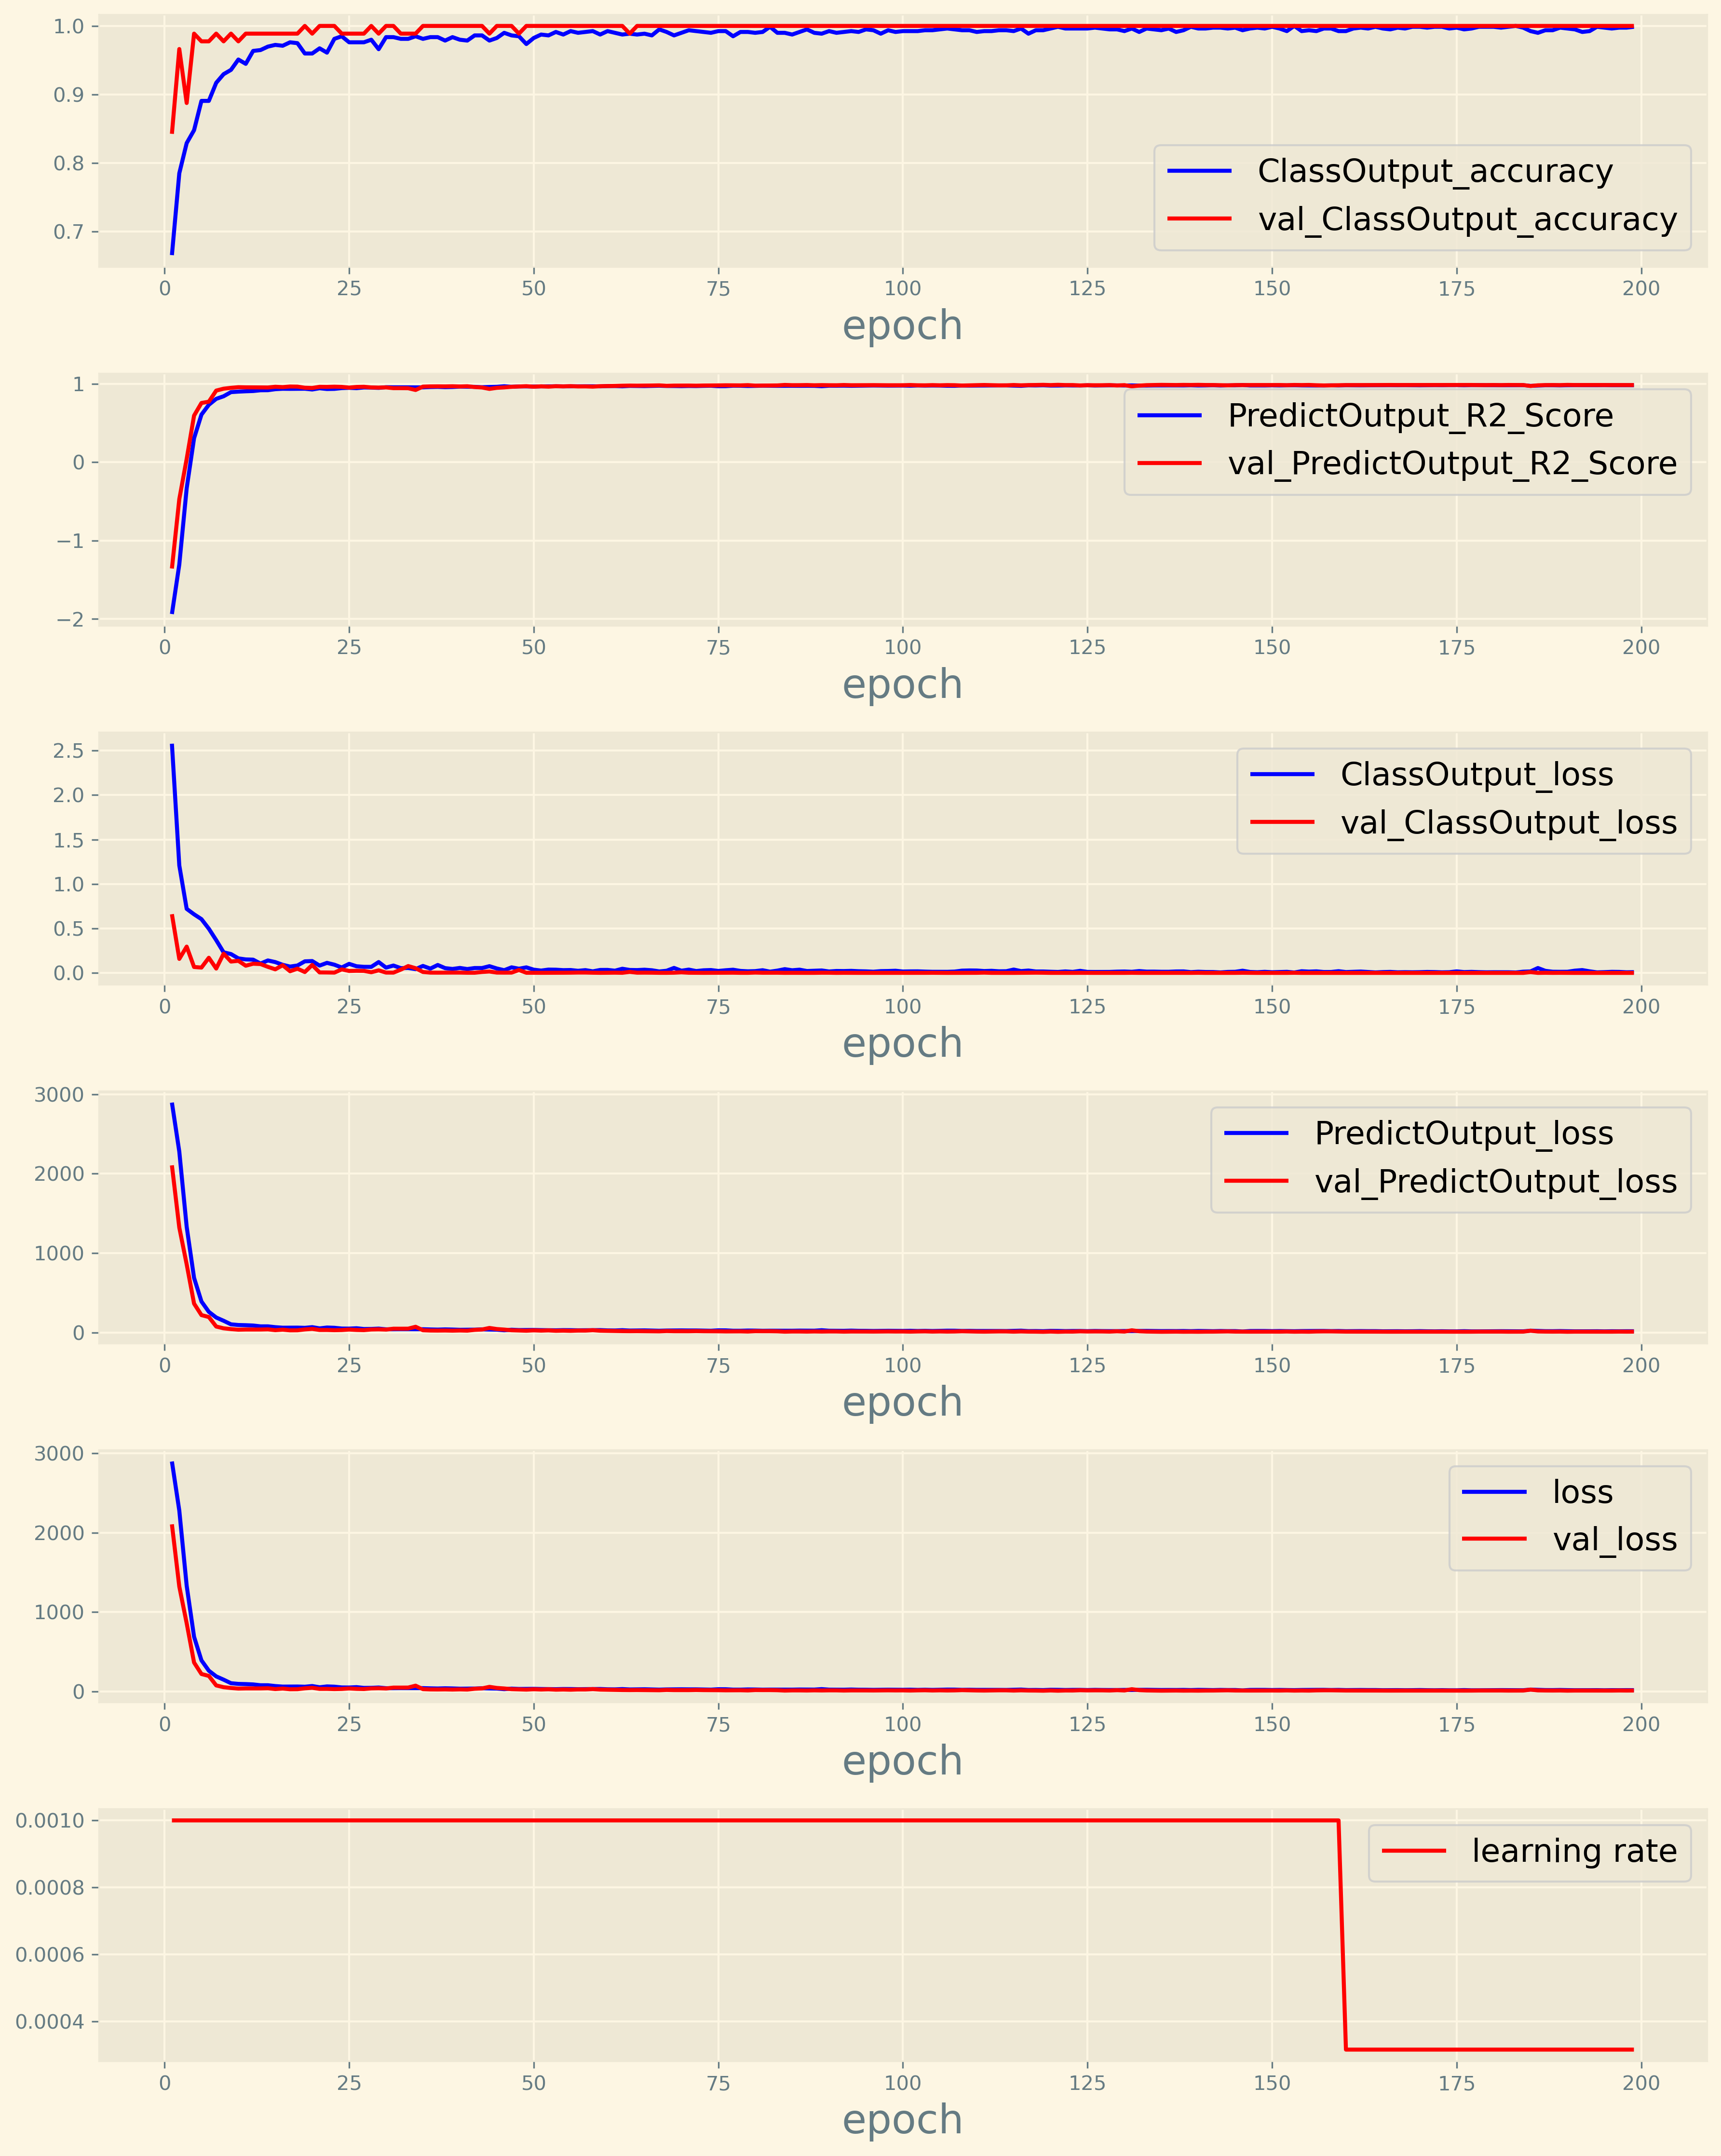

(1107, 64) (1107, 64)


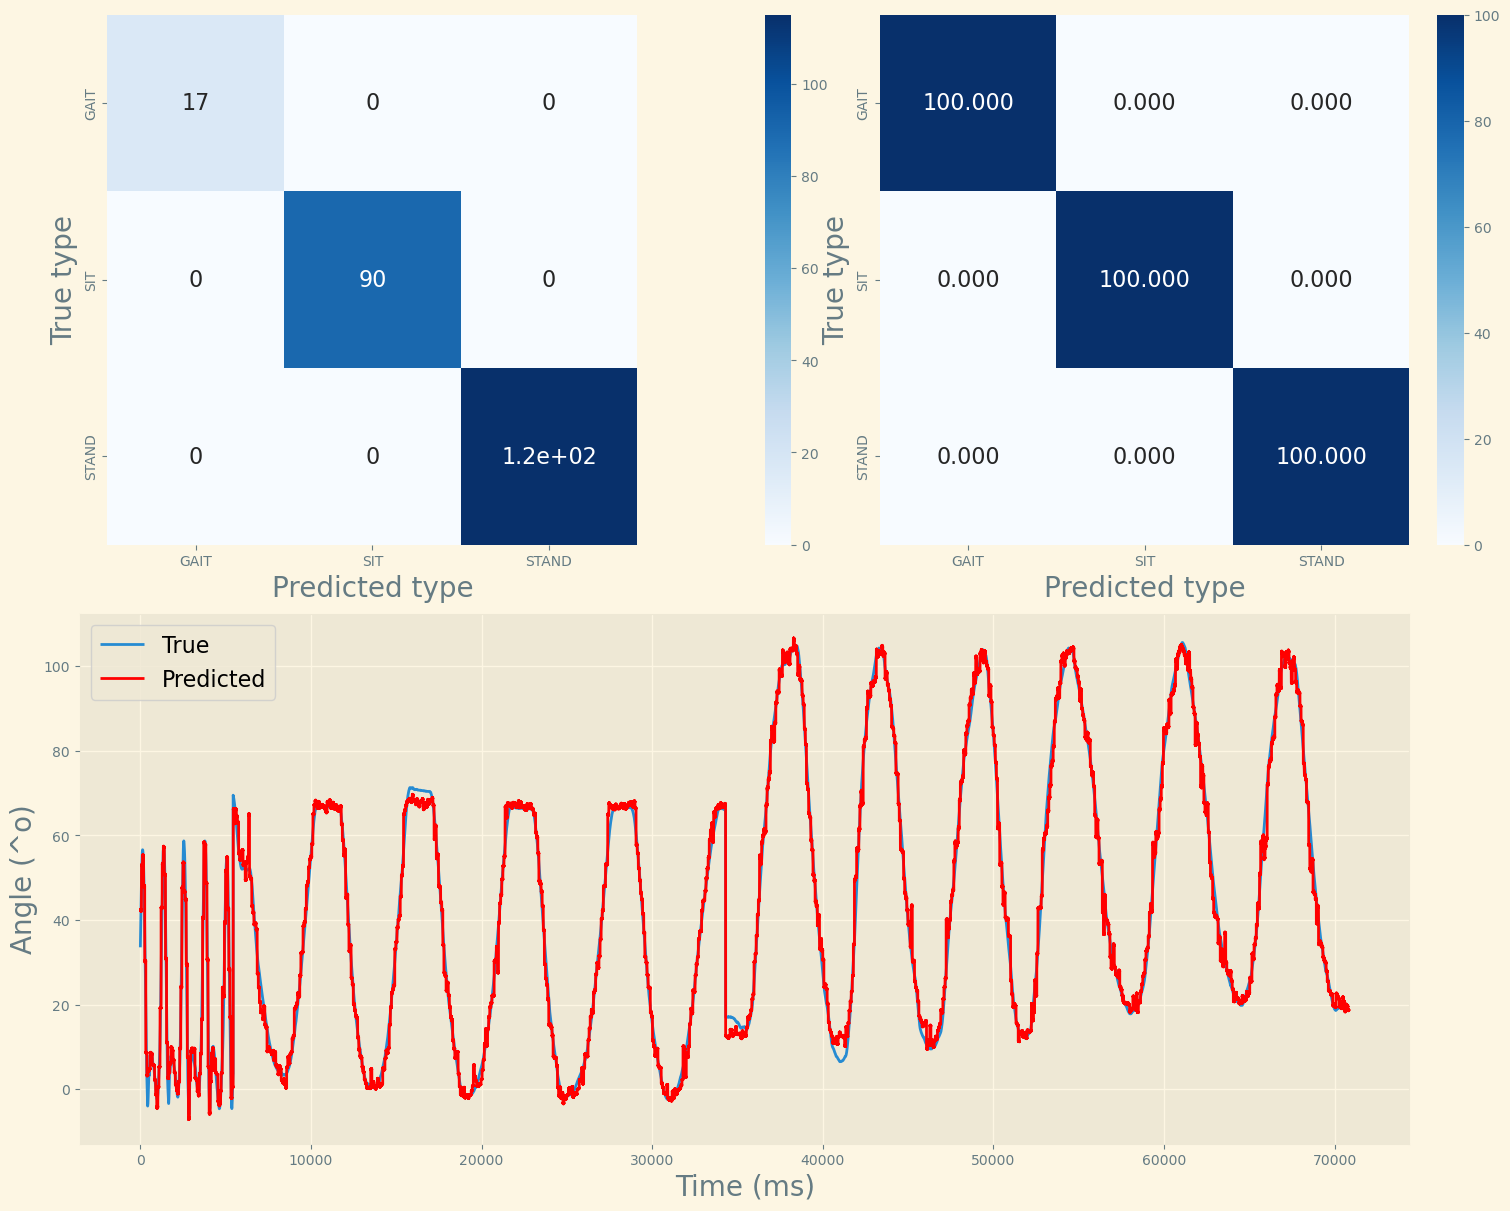

accuracy：100.000, precision：100.000, recall：100.000, specificity：100.000, npv：100.000, f1：100.000
r2：0.985, mse：16.682, rmse：4.084, mae：3.033
Mean and standard deviation of the test results of 3 experiments:
accuracy  =  99.850 / std  =  0.212
precision  =  99.904 / std  =  0.135
recall  =  99.346 / std  =  0.924
specificity  =  99.896 / std  =  0.147
npv  =  99.946 / std  =  0.076
f1  =  99.615 / std  =  0.544
r2  =  0.986 / std  =  0.001
mse  =  14.772 / std  =  1.351
rmse  =  3.840 / std  =  0.173
mae  =  2.763 / std  =  0.196
train_time  =  309.698 / std  =  103.973


In [4]:
"""Target-domain Model Training"""
subType = 'targetSubjects'
dicts = {'tasks':['N-N', 'A-A', 'N-A'],
         'targetSubjects':[['1N','2N','3N','4N','5N','6N','7N','8N','9N','10N','11N'],
                           ['1A','2A','3A','4A','5A','6A','7A','8A','9A','10A','11A'],
                           ['1A','2A','3A','4A','5A','6A','7A','8A','9A','10A','11A']]}
modelTypes = ['CNN-LSTM', 'CNN-BiLSTM', 'CNN-GRU', 'CNN-BiGRU', 'CNN-TCN', 'Sinc-LSTM', 'Sinc-BiLSTM', 'Sinc-GRU', 'Sinc-BiGRU', 'Sinc-TCN']

for modelType in modelTypes:
     for i in range(len(dicts['tasks'])):
        for j in range(len(dicts['targetSubjects'][0])):
            clear()
            task = dicts['tasks'][i]
            targetSubject=dicts['targetSubjects'][i][j]
            print('Inter-Subject target-model training and testing of: model-%s, task-%s, subject-%s' % (modelType, task, targetSubject))
            train_utils = ModelTrainTest(model_type=modelType, attention=attention)
            train_utils.train(with_transfer=withTransfer, task=task, target_subject=targetSubject, sub_type=subType, 
                              train_plot=trainPlot, reduce_lr=ReduceLR, early_stop=EarlyStop, save_model_history=saveModelHistory, 
                              save_predict_result=savePredictResult, save_plot_result=savePlotResult)